<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных-и-первизное-ознакомление" data-toc-modified-id="Импорт-данных-и-первизное-ознакомление-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных и первизное ознакомление</a></span></li><li><span><a href="#Проверка-рассчёта-эффективности-обогащения" data-toc-modified-id="Проверка-рассчёта-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка рассчёта эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-изменения-конентрации-металлов" data-toc-modified-id="Исследование-изменения-конентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование изменения конентрации металлов</a></span></li><li><span><a href="#Исследование-распределения-гранул" data-toc-modified-id="Исследование-распределения-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследование распределения гранул</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ." data-toc-modified-id="Исследование-суммарной-концентрации-веществ.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ.</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков-и-функции-оценки" data-toc-modified-id="Подготовка-признаков-и-функции-оценки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков и функции оценки</a></span></li><li><span><a href="#Обучение-моделей-и-поиск-наилучшей" data-toc-modified-id="Обучение-моделей-и-поиск-наилучшей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей и поиск наилучшей</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

### Импорт данных и первичное ознакомление

Произведем импорт необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from scipy import stats as st
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

Далее, произведем подгрзуку данных, и настройку отображения.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_all = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Подготовим функию, которая будет выводить основные данные о подгруженных фреймов.

In [4]:
def data_info(data):
    print(data.info())
    print((data.isna().sum() / data.shape[0]) * 100)
    display(data.head())

Автоматизируем процесс вывода данных цикл. Ознакомимся с данными.

In [5]:
list_data = [data_train, data_test, data_all]

for data in list_data:
    data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

Из информаии о фреймах видно, что в данных имеются пропуски, а датасет data_test не имеет ряд столбцов, которые есть в других датасетах.

### Проверка рассчёта эффективности обогащения

Выполним проверку расчёта эффективности обогащение по формуле из ТЗ. Для локоничности созданим новые объекты Pandas и рассчитаем MAE.

In [6]:
c_rec = data_train['rougher.output.concentrate_au']
f_rec = data_train['rougher.input.feed_au']
t_rec = data_train['rougher.output.tail_au']

data_train_1 = pd.DataFrame()
data_train_1['recovery'] = data_train['rougher.output.recovery']
data_train_1['calculate_recovery'] = ((c_rec * (f_rec - t_rec)) / (f_rec * (c_rec - t_rec))) * 100

print('MAE:', mean_absolute_error(data_train_1['calculate_recovery'], data_train_1['recovery']))

MAE: 9.73512347450521e-15


Значение MAE очень мало, из этого следует, что рассчёт верен.

### Анализ признаков

Изпользуя инструменты работы со множествами, ознакомимся с признаками, которые отсутствуют в тестовой выборке.

In [7]:
set_train = set(data_train.columns)
set_valid = set(data_test.columns)

drop_col = set_train.difference(set_valid)
print(drop_col)

{'final.output.tail_pb', 'rougher.output.tail_ag', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_sol', 'final.output.tail_au', 'primary_cleaner.output.tail_sol', 'final.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_sol', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag', 'rougher.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_pb', 'final.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'final.output.recovery', 'primary_cleaner.output.concentrate_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_sol', 'rougher.output.recovery',

Как видно из списка, в тестовой выборке нет елевых призаков *final.output.recovery* и *rougher.output.recovery*, а так же целого набора признаков. Судя по наименованиям, они становятся известны в хоже выполнения тех. процесса. При подготовке данных для обучения модели, **необходимо будет из тренировочной выборки удалить данные признаки**, дабы модель училась только на актуальных к моменту предсказания данных.

### Предобработка данных

Из первичного ознакомления с датасетами известно, что в них имеются пропуски, а так же, неверно определен формат столбца `date`.

Пропуски заполним средним арифметических по столбу, формат столбца `date` приведем к формату `datetime`.

In [8]:
def eda(data):
    list_columns = data.columns
    # проидёмся по каждому столбцу инд. что бы получить среднее
    
    for col in list_columns:
        
        if data[col].isna().sum() > 0:
            mean = data[col].mean()
            data[col] = data[col].ffill(axis=0)
        else:
            continue
            
    # в каждом датасете приведем дату к верному формату
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
    return data

data_train = eda(data_train)
data_test = eda(data_test)
data_all = eda(data_all)

### Вывод

В первой части работы мы подгрузили необходимые бибилиотеки, первично ознакомились с датасетами, убедились, что рассчёт эффективности выполнен в фреймах корректно, и произвели первичную обработку данных.

## Анализ данных

### Исследование изменения конентрации металлов

Нам необходимо исследовать изменение концентрации металоов на трех этапах:

- Флотация
- Очистка
- Итог

Для этого, подготовим три датасета, каждом из которых будут содержаться данных по трём этапам по каждому металлу отдельно.
Так же сразу подготовим данных для следующего этапа - создадим датасеты с данными о размерах зерен на двух этапах в тренировочной и тестовой выборках.

In [9]:
data_au = data_all[['rougher.output.concentrate_au',
                     'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
data_ag = data_all[['rougher.output.concentrate_ag',
                     'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
data_pb = data_all[['rougher.output.concentrate_pb',
                     'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

Для автоматизации проесса, подготовим функцию, которая будет принимать на вход датасет, и информационные параметры, строить графическое изобраение распределения и возвращать его.

Для визуализации распределений будем использовать гистограммы и графики типа boxplot.

In [10]:
def histplot_con(data, titles, labels):
    fig = plt.figure(figsize=(12,7))
    fig = plt.xlabel(labels)
    fig = plt.title(titles)
    fig = plt.grid()
    ax = sns.histplot(data, alpha=0.4, figure=fig)
    plt.show()
    data.boxplot(figsize=(12,7), grid=True)
    plt.ylabel(labels)
    plt.title(titles)

Поочередно выведем визуализацию распределения для каждого металла.

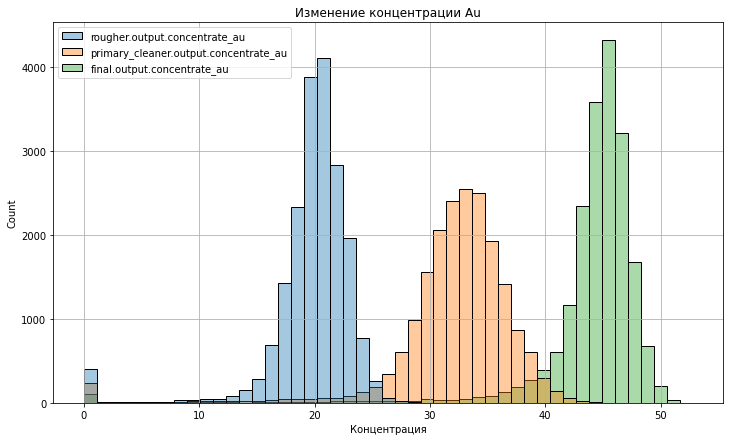

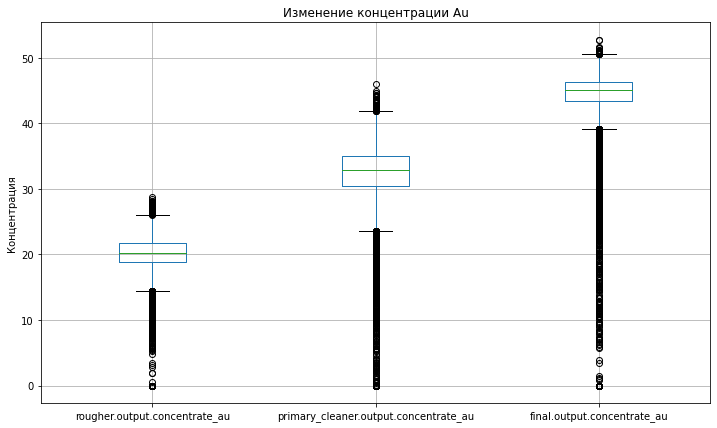

In [11]:
histplot_con(data_au,'Изменение концентрации Au', 'Концентрация')

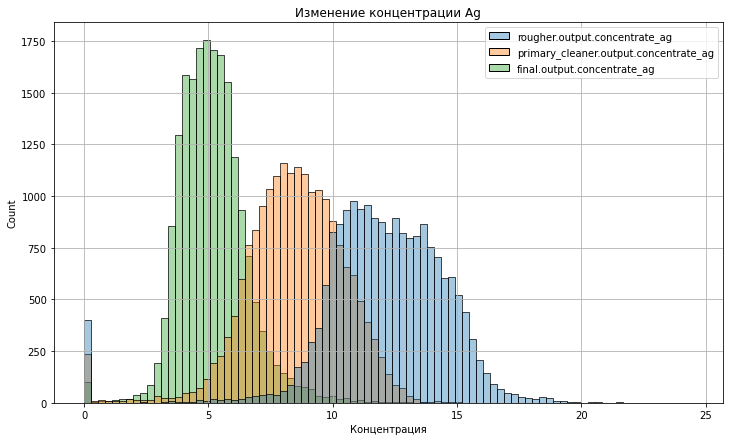

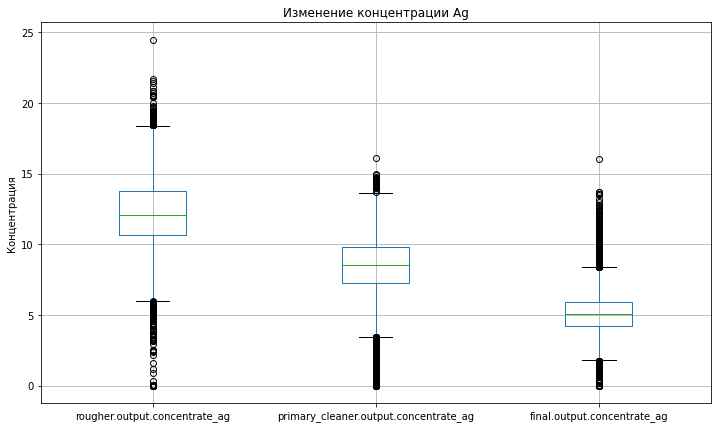

In [12]:
histplot_con(data_ag,'Изменение концентрации Ag', 'Концентрация')

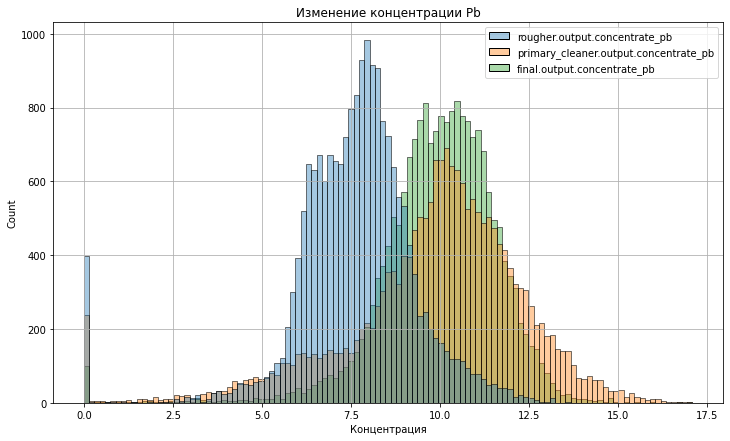

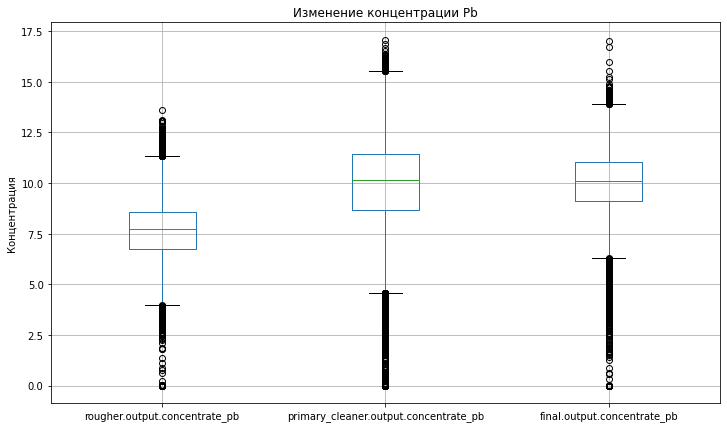

In [13]:
histplot_con(data_pb,'Изменение концентрации Pb', 'Концентрация')

Из графиков распределение может сделать следубщие выводы:

1. Концентрация золота растет по мере прохождения тех. процесса;
2. Концентрация серебра падает;
3. Концетрация свинца скорее имеет тренд к росту, но незначительному.

Данные выводы ложатся не протиречат логике о тех. проессе. Замечаний нет.

Отдельно необходимо отметить аномалии - большое количество наблюдений с 0 концентрацией. Причины данной аномалии предположить сложно, но устранить её будет необходимо после уточнений (рассмотрения суммарной концетрации).

### Исследование распределения гранул

Воспользуемся заранее подготовленными датасетами и исследуем распределение размеров гранул. В качестве визуализаии ограничемся гистограммами, но ещё ознакомимся и с числовым описанием данных.

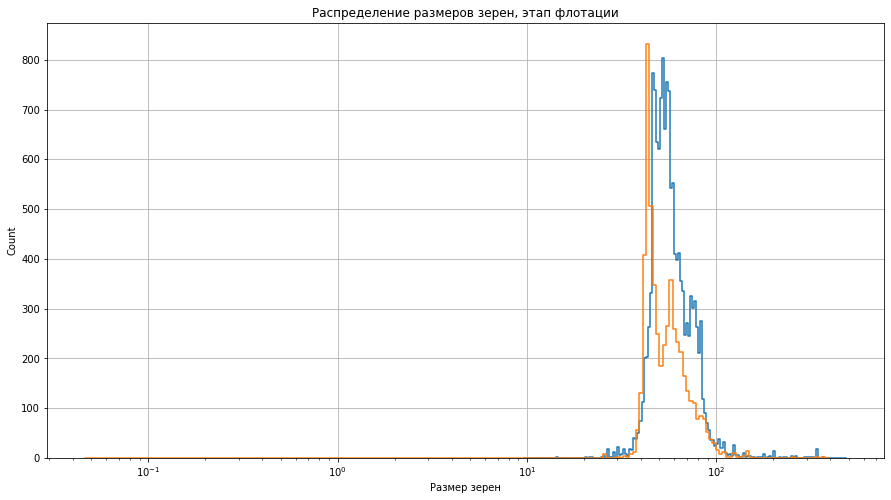

In [14]:
fig = plt.figure(figsize=(15,8))
fig = plt.xlabel('Размер зерен')
fig = plt.title('Распределение размеров зерен, этап флотации')
fig = plt.grid()
ax = sns.histplot(data=data_train['rougher.input.feed_size'], alpha=0.7, figure=fig, element='step', fill=False, log_scale=True)
ax = sns.histplot(data=data_test['rougher.input.feed_size'], alpha=0.7, figure=fig, element='step', fill=False, log_scale=True)

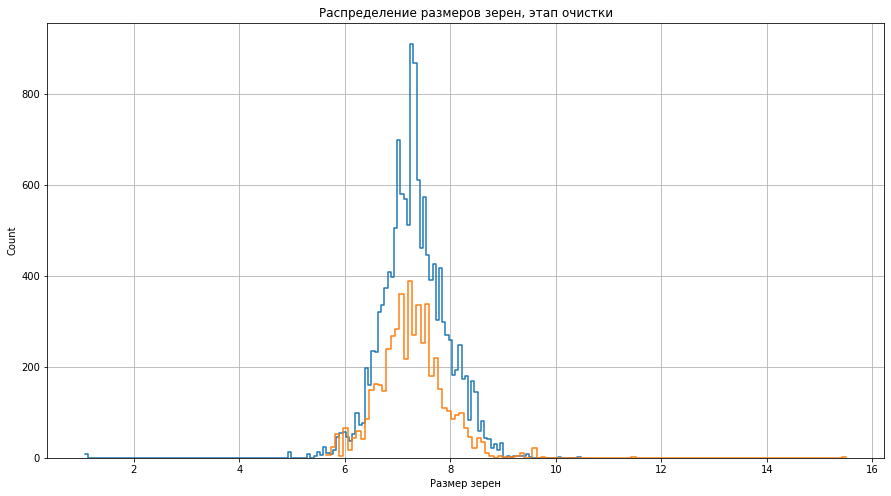

In [15]:
fig = plt.figure(figsize=(15,8))
fig = plt.xlabel('Размер зерен')
fig = plt.title('Распределение размеров зерен, этап очистки')
fig = plt.grid()
ax = sns.histplot(data=data_train['primary_cleaner.input.feed_size'], alpha=0.7, figure=fig, element='step', fill=False)
ax = sns.histplot(data=data_test['primary_cleaner.input.feed_size'], alpha=0.7, figure=fig, element='step', fill=False)

Визуально, распределения очень схожи, средние будут явно отличаться, но их расличие не критично, так же схожи и "ширина" гистограмм для двух выборок. Подтвердим предположения, взглянув на числовое описание.

In [16]:
print(data_train['rougher.input.feed_size'].describe())
print('___________')
print(data_test['rougher.input.feed_size'].describe())

count   14149.00
mean       60.24
std        23.01
min         9.66
25%        48.97
50%        55.27
75%        66.01
max       484.97
Name: rougher.input.feed_size, dtype: float64
___________
count   5290.00
mean      55.95
std       19.08
min        0.05
25%       43.91
50%       50.85
75%       62.45
max      392.49
Name: rougher.input.feed_size, dtype: float64


На этапе флотации данные тестовой и тренировочной выборки очень близки, замечаний нет.

In [17]:
print(data_train['primary_cleaner.input.feed_size'].describe())
print('___________')
print(data_test['primary_cleaner.input.feed_size'].describe())

count   14149.00
mean        7.32
std         0.61
min         1.08
25%         6.96
50%         7.29
75%         7.70
max        10.47
Name: primary_cleaner.input.feed_size, dtype: float64
___________
count   5290.00
mean       7.27
std        0.61
min        5.65
25%        6.89
50%        7.25
75%        7.60
max       15.50
Name: primary_cleaner.input.feed_size, dtype: float64


На этапе очистки тоже.

### Исследование суммарной концентрации веществ.

Для выполнения исследование, создадим новые признаки - концентрация веществ на каждом из трех основных этапов. Получим значения признаков путем суммирования.

Далее, построим гистограммы и графики типа boxplot, что бы визуализировать распределения.

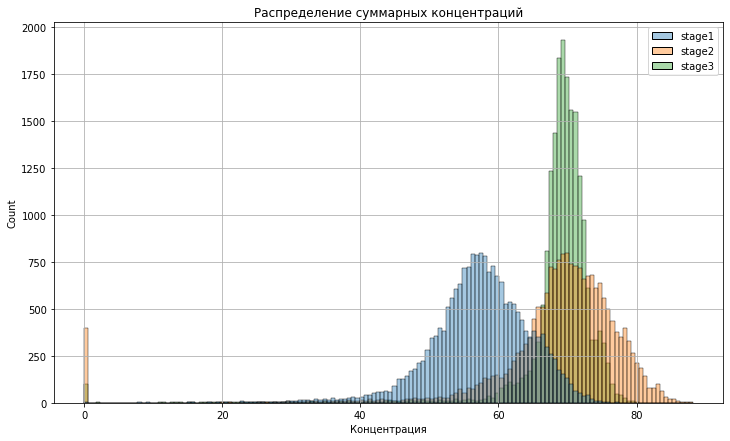

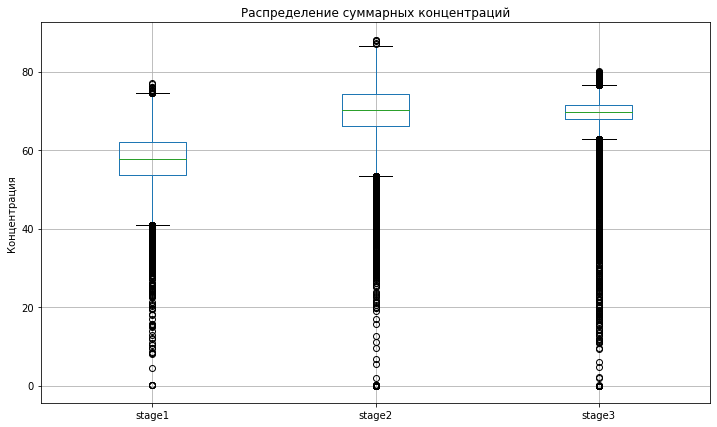

In [18]:
list_columns_1 = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']
list_columns_2 = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
                  'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
list_columns_3 = ['final.output.concentrate_au', 'final.output.concentrate_ag',
                  'final.output.concentrate_pb', 'final.output.concentrate_sol']
list_columns = [list_columns_1, list_columns_2, list_columns_3]

stage_int = 0
list_cont = list()
for stage in list_columns:
    stage_int +=1
    name_col = 'stage' + str(stage_int)
    data_all[name_col] = data_all[stage].sum(axis=1)
    list_cont.append(name_col)

histplot_con(data_all[['stage1', 'stage2', 'stage3']],'Распределение суммарных концентраций', 'Концентрация')

Главное, что ообращает на себя внимание - наличие наблюдений с 0 суммарной концентрацией, это явное следние такого же явления из пункта 2.1. Для дальнейшей работы необходимо удалить из выборок данные наблюдения.

Что касается самих распределенией, явных проблем не видно.

Для дальнейшей работы заменим числовые индексы на значения столбов `date` у всех датасетов.

In [19]:
def setindex(data):
    data = data.set_index('date')
    return data

data_train = setindex(data_train)
data_test = setindex(data_test)
data_all = setindex(data_all)

Далее, отберем наблюдения с 0 суммарной концентрацией. Сгрупппируем их в новый датасет.

In [20]:
del_data = data_all.loc[(data_all['stage1'] == 0) | (data_all['stage2'] == 0) | (data_all['stage3'] ==0)]
del_data.head(10)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,stage1,stage2,stage3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.57,10.41,4.59,46.61,68.40,10.71,1.51,17.88,2.51,131.25,13.97,7.25,1.20,8.51,9.72,19.12,37.63,16.46,3.37,6.86,3.43,1601.67,-500.29,1600.15,-499.63,1599.54,-499.50,1599.34,-500.36,41359.06,3196.13,3205.72,2.53,7.52,2.81,581.61,65.62,41.15,7.11,13.32,7.50,13.31,7.49,0.00,0.00,0.00,0.00,0.00,4.78,0.82,20.05,1.94,999.03,-499.85,1600.61,-500.33,1598.65,-500.36,1398.39,-501.54,1197.18,-500.21,1198.54,-499.65,13.61,4.98,9.55,3.10,25.96,-498.10,23.90,-500.05,24.96,-500.21,23.98,-500.61,14.03,-550.40,12.03,-550.57,10.05,-500.80,7.98,-499.58,11.98,-599.16,58.60,0.00,66.18
2016-01-16 22:00:00,4.58,10.69,5.27,46.25,70.68,10.73,1.64,18.35,2.54,141.18,13.98,7.25,1.25,8.47,9.78,19.22,37.72,15.52,3.08,7.32,3.10,1604.85,-500.92,1603.01,-499.63,1599.31,-501.20,1599.44,-499.31,41274.20,3196.96,3205.15,2.57,7.31,2.97,562.97,66.01,41.98,7.65,14.43,7.58,14.48,7.58,0.00,0.00,0.00,0.00,0.00,4.96,0.89,19.63,2.09,999.85,-500.08,1599.41,-500.19,1598.92,-

Используя индексы нового датасета, удалить из всех выборок наблюдения с 0 суммарной концентрацией.

In [21]:
def dropnull(data):
    set_index_1 = set(data.index)
    set_index_2 = set(del_data.index)
    set_drop = set_index_1.intersection(set_index_2)
    data = data.drop(set_drop, axis=0)
    return data

data_train = dropnull(data_train)
data_test = dropnull(data_test)
data_all = dropnull(data_all)

Убедимся, что шаг выполнен успешно.

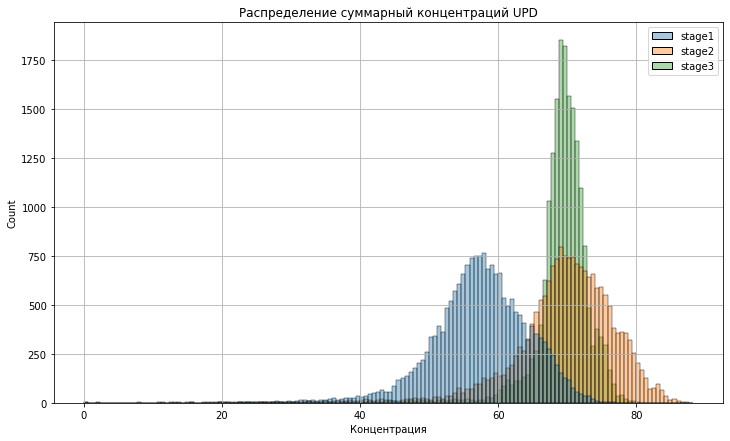

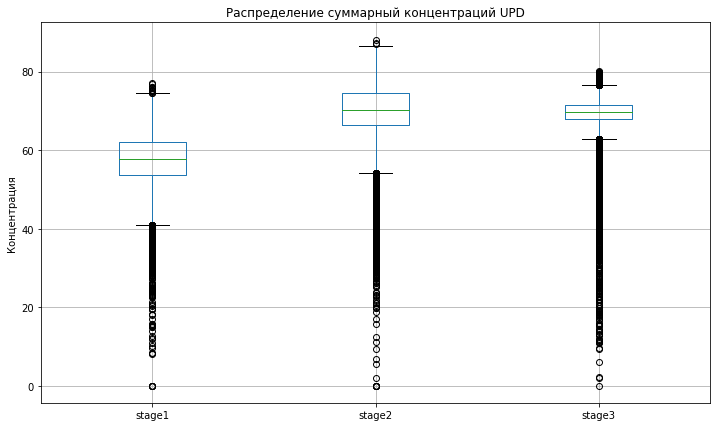

In [22]:
histplot_con(data_all[['stage1', 'stage2', 'stage3']],'Распределение суммарный концентраций UPD', 'Концентрация')

Как видим, шаг выполнен успешно, хотя, судя по графикам, имеются наблюдения с суммарной концентрацией, близкой к 0, пока что трогать их не будем.

### Выводы

На данном шаге:

1. Были исследованы распределения концентраций металлов на разных этапах;
2. Исследованы распределения размеров зерен у тестовой и тренировочной выборках;
3. Рассмотрены распределения суммарных концентраций веществ на разных этапах.

Были выявлены и устранены аномалии с 0 суммарной концентрацией, а так же мы получили подтвержение, что распределением размеров зерен у тестовой и обучающей выборки схожи - разбивна на выборки корректна.

## Модель

### Подготовка признаков и функции оценки

Для начала разобьем исходные выборки. Проверим корректность разбивки.

In [23]:
target_r = data_all.loc[data_test.index, 'rougher.output.recovery']
target_f = data_all.loc[data_test.index, 'final.output.recovery']
target_f_t = data_train['final.output.recovery']
target_r_t = data_train['rougher.output.recovery']
features = data_train.drop(list(drop_col), axis=1)

print('Размер целевого признака 1 тестовой выборки:', target_r.shape)
print('Размер целевого признака 2 тестовой выборки:', target_f.shape)
print('Размер тестовой выборки:', data_test.shape)

print('Размер целевого признака 1 обучающей выборки:', target_f_t.shape)
print('Размер целевого признака 1 обучающей выборки:', target_r_t.shape)
print('Размер обучающей выборки:', features.shape)


Размер целевого признака 1 тестовой выборки: (5154,)
Размер целевого признака 2 тестовой выборки: (5154,)
Размер тестовой выборки: (5154, 52)
Размер целевого признака 1 обучающей выборки: (13795,)
Размер целевого признака 1 обучающей выборки: (13795,)
Размер обучающей выборки: (13795, 52)


Разбивка выполнена корректно. Теперь подготовим функцию рассчёта оценки предсказаний.

In [24]:
def smape(target, predict):
    # функция вычисляет sMAPE, на вход получает предсказание и ответы, возвращает оценку.
    
    multipliter = (target - predict).abs()
    delimiter = (target.abs() + predict)
    smape = ((multipliter / delimiter).sum() / multipliter.shape[0]) * 100
    
    return smape


def all_smape(features, target, model, param):
    # функция считает среднюю оценку кросс валидации
    #на вход получает признаки, целевые признаки и модель, возвращает ср. оценку
    
    model_def = copy.deepcopy(model)
    my_score = make_scorer(smape, greater_is_better=False)
    scores = GridSearchCV(model, param, cv=5, n_jobs=-1, scoring=my_score)
    scores.fit(features, target)
    
    return scores

### Обучение моделей и поиск наилучшей

Теперь поочередно обучим модели линейной регресси, решающего дерева и случайного леса. Выведем наилучшие оценки.

In [25]:
list_model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
list_name_model = ['Линейная регрессия', 'Решающее дерево', 'Рандомный лес']
list_params = [{}, {'max_depth': range(1,11)}, {'max_depth': range(1,6), 'n_estimators': range(1,6)}]

for i in range(len(list_model)):
    model = list_model[i]
    name_model = list_name_model[i]
    param = list_params[i]
    score = all_smape(features, target_r_t, model, param)
    score_2 = all_smape(features, target_f_t, model, param)
    
    print(name_model)
    print('------------')
    print('Rougher sMAPE')
    print('Лучная оценка', score.best_score_)
    print(score.best_params_)
    print('Final sMAPE')
    print('Лучшая оценка:', score_2.best_score_)
    print(score_2.best_params_)
    print('Итоговая sMAPE:', 0.25 * score.best_score_ + 0.75 * score_2.best_score_)
    print('-------------')

Линейная регрессия
------------
Rougher sMAPE
Лучная оценка -3.6339033654501476
{}
Final sMAPE
Лучшая оценка: -5.495100257579004
{}
Итоговая sMAPE: -5.02980103454679
-------------
Решающее дерево
------------
Rougher sMAPE
Лучная оценка -3.5355690048397816
{'max_depth': 3}
Final sMAPE
Лучшая оценка: -4.693057338487276
{'max_depth': 2}
Итоговая sMAPE: -4.403685255075403
-------------
Рандомный лес
------------
Rougher sMAPE
Лучная оценка -3.2913393759577603
{'max_depth': 5, 'n_estimators': 5}
Final sMAPE
Лучшая оценка: -4.59834228007205
{'max_depth': 4, 'n_estimators': 5}
Итоговая sMAPE: -4.271591554043478
-------------


Наилучшая оценка у рандомного леса в гиперпараметрами - глубина: 4 и 5, число деревьев: 2 и 4. Данную модель проверим на тестовой выборке.

### Проверка на тестовой выборке

Проверим наилучшую модель из предидущего пункта на тестовой выборке. Воспользуемся функцией написанной `smape`, для рассчёта части итоговой оценки.

In [26]:
model = RandomForestRegressor(max_depth=4, n_estimators=2)
model_2 = RandomForestRegressor(max_depth=5, n_estimators=4)
model.fit(features, target_r_t)
predict_1 = model.predict(data_test)
smape_1 = smape(target_r, predict_1)
model_2.fit(features, target_f_t)
predict_2 = model_2.predict(data_test)
smape_2 = smape(target_f, predict_2)
ismape = 0.25 * smape_1 + 0.75 * smape_2
print('Итоговая sMAPE:', ismape)

Итоговая sMAPE: 3.746272456231198


Результаты лучше, чем на обучающей выборке, проверим адекватность модели, сравнив её с моделью, которая всегда предсказывает среднее значение.

In [27]:
model = DummyRegressor(strategy='mean')
model.fit(features, target_r_t)
predict_1 = model.predict(data_test)
smape_1 = smape(target_r, predict_1)
model.fit(features, target_f_t)
predict_2 = model.predict(data_test)
smape_2 = smape(target_f, predict_2)
ismape = 0.25 * smape_1 + 0.75 * smape_2
print('Итоговая sMAPE:', ismape)

Итоговая sMAPE: 3.883302033694264


Выбранная модель показала бОльшую адекватность, что валидирующая, задача выполнена.

## Выводы

В ходе выполнения работы, была проведения предварительная обработка данных, исследованы распределния ряда признаков, обнаружены и устранены аномалии в распределениях. Были обучены три типа моделей, выбрана модель с наилучшей оценкой и проверена на тестовой выборке с использованием валидирубщей модели. 

Выбрана модель прошла проверку на адекватность. Можно утверждать, что задача выполнена.